<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Final Project Submission</a></span></li></ul></li><li><span><a href="#Initialize-data" data-toc-modified-id="Initialize-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialize data</a></span></li><li><span><a href="#Scrub-data" data-toc-modified-id="Scrub-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scrub data</a></span></li><li><span><a href="#Dealing-with-Outliers" data-toc-modified-id="Dealing-with-Outliers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dealing with Outliers</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic regression</a></span></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: Kristine Petrosyan
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger 
* Blog post URL:


# Initialize data

In [100]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data= pd.read_csv('kc_house_data.csv')
data.sample(70)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2452,7852150140,10/7/2014,381000.0,3,2.50,1470,3999,2.0,0.0,0.0,...,7,1470,0.0,2003,0.0,98065,47.5328,-121.871,1960,4444
16883,3303990380,12/4/2014,972000.0,4,3.25,4010,13797,2.0,0.0,0.0,...,11,4010,0.0,2003,0.0,98059,47.5229,-122.152,3980,12120
14032,1498300775,6/24/2014,355000.0,2,2.25,930,747,2.0,0.0,0.0,...,8,630,300.0,2007,0.0,98144,47.5844,-122.316,940,6000
7000,1761100190,7/24/2014,225000.0,3,2.25,1470,6808,1.0,0.0,0.0,...,7,1160,310.0,1984,0.0,98023,47.2884,-122.365,1570,7881
877,9536602080,12/19/2014,229000.0,3,1.00,1020,8100,1.0,0.0,0.0,...,7,1020,0.0,1954,0.0,98198,47.3586,-122.314,1020,8100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16057,3275910020,2/13/2015,340000.0,4,2.50,2181,5521,2.0,0.0,0.0,...,8,2181,0.0,2006,NaN,98001,47.3503,-122.291,2333,5143
2716,546000045,3/25/2015,422500.0,2,1.00,800,4046,1.0,0.0,0.0,...,7,800,0.0,1940,0.0,98117,47.6895,-122.382,1400,4046
427,9808650060,2/25/2015,1300000.0,3,2.00,2350,15021,1.0,0.0,0.0,...,8,1770,580.0,1976,NaN,98004,47.6408,-122.219,3530,15715
12116,2832100270,5/7/2015,306888.0,4,1.50,1940,8970,1.5,0.0,0.0,...,7,1270,670.0,1980,NaN,98125,47.7297,-122.326,1960,8470


In [67]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Scrub data

In [68]:
data=data.dropna()

In [69]:
data.shape

(15762, 21)

In [70]:
data.loc[data['price']==500000.0].count()

id               115
date             115
price            115
bedrooms         115
bathrooms        115
sqft_living      115
sqft_lot         115
floors           115
waterfront       115
view             115
condition        115
grade            115
sqft_above       115
sqft_basement    115
yr_built         115
yr_renovated     115
zipcode          115
lat              115
long             115
sqft_living15    115
sqft_lot15       115
dtype: int64

In [71]:
#data1=data.drop(data.loc[data['price']==500000.0].index)

In [72]:
# Frequency control of the values
for col in data.columns:
    try:
        print(col, data[col].value_counts(normalize=True)[:5])
    except:
        print(col, data[col].value_counts(normalize=True))

    print('\n')

id 6632900574    0.000127
9353300600    0.000127
5101402435    0.000127
722039087     0.000127
1523049207    0.000127
Name: id, dtype: float64


date 6/25/2014    0.006535
6/23/2014    0.006471
4/28/2015    0.005900
7/8/2014     0.005900
7/14/2014    0.005900
Name: date, dtype: float64


price 350000.0    0.008184
450000.0    0.007613
500000.0    0.007296
550000.0    0.007169
425000.0    0.007042
              ...   
275053.0    0.000063
763101.0    0.000063
438900.0    0.000063
959750.0    0.000063
311300.0    0.000063
Name: price, Length: 3034, dtype: float64


bedrooms 3    0.451719
4    0.322231
2    0.127078
5    0.075054
6    0.012181
Name: bedrooms, dtype: float64


bathrooms 2.50    0.254029
1.00    0.175168
1.75    0.141226
2.25    0.094341
2.00    0.088504
1.50    0.067250
2.75    0.054117
3.00    0.034450
3.50    0.034450
3.25    0.027154
3.75    0.006598
4.00    0.006344
4.50    0.004758
4.25    0.003934
0.75    0.003172
4.75    0.001079
5.00    0.000888
Name: bathrooms, dt

In [73]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [74]:
#data['date']=pd.to_datetime(data1["date"]).dt.strftime("%Y%m%d")

In [75]:
data['sqft_basement'].value_counts(normalize=True)

0.0       0.593960
?         0.021127
600.0     0.009834
500.0     0.009580
700.0     0.009390
            ...   
2310.0    0.000063
1281.0    0.000063
1024.0    0.000063
2850.0    0.000063
2300.0    0.000063
Name: sqft_basement, Length: 283, dtype: float64

In [76]:
# Dropping rows with the value ?
data.drop(data.index[data['sqft_basement'] == '?'], inplace = True)

In [77]:
data['sqft_basement'].unique()

array(['400.0', '910.0', '0.0', '1530.0', '730.0', '300.0', '970.0',
       '760.0', '720.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '990.0', '600.0', '550.0', '1000.0',
       '1600.0', '1700.0', '500.0', '700.0', '1040.0', '1010.0', '240.0',
       '290.0', '800.0', '540.0', '560.0', '840.0', '770.0', '570.0',
       '1490.0', '620.0', '650.0', '180.0', '1130.0', '450.0', '1640.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '1310.0',
       '630.0', '2000.0', '390.0', '210.0', '1950.0', '440.0', '220.0',
       '1160.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0', '1150.0',
       '1200.0', '680.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0',
       '870.0', '1250.0', '1100.0', '1400.0', '530.0', '490.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0', '270.0',
       '350.0', '935.0', '200.0', '850.0', '1470.0', '160.0', '950.0',
       '1370.0', '460.0', '50.0', '710.0', '1900.0', '340.

In [78]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)


In [79]:
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y', errors='coerce')
data['date'][:10]

1    2014-12-09
3    2014-12-09
4    2015-02-18
5    2014-05-12
8    2015-04-15
9    2015-03-12
11   2014-05-27
13   2014-10-07
14   2015-03-12
15   2015-01-24
Name: date, dtype: datetime64[ns]

In [80]:
data['month'] = data['date'].dt.month
data['month'].head()

1    12
3    12
4     2
5     5
8     4
Name: month, dtype: int64

In [81]:
# Create new 'season' column 
season = {
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'fall',
    10: 'fall',
    11: 'fall',
    12: 'winter',
}
data['season'] = data['month'].replace(season)
data[['month', 'season']][:10]

,month,season
1,12,winter
3,12,winter
4,2,winter
5,5,spring
8,4,spring
9,3,spring
11,5,spring
13,10,fall
14,3,spring
15,1,winter


In [84]:
number_cols = data.select_dtypes('number').columns
number_cols

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month'],
      dtype='object')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15429 non-null  int64         
 1   date           15429 non-null  datetime64[ns]
 2   price          15429 non-null  float64       
 3   bedrooms       15429 non-null  int64         
 4   bathrooms      15429 non-null  float64       
 5   sqft_living    15429 non-null  int64         
 6   sqft_lot       15429 non-null  int64         
 7   floors         15429 non-null  float64       
 8   waterfront     15429 non-null  float64       
 9   view           15429 non-null  float64       
 10  condition      15429 non-null  int64         
 11  grade          15429 non-null  int64         
 12  sqft_above     15429 non-null  int64         
 13  sqft_basement  15429 non-null  float64       
 14  yr_built       15429 non-null  int64         
 15  yr_renovated   1542

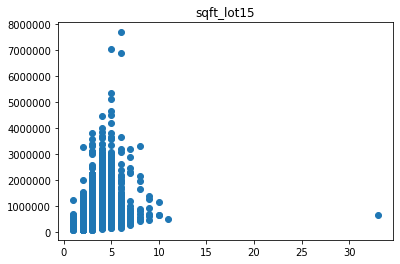

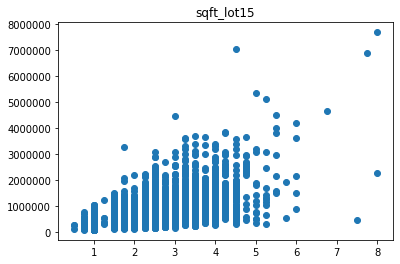

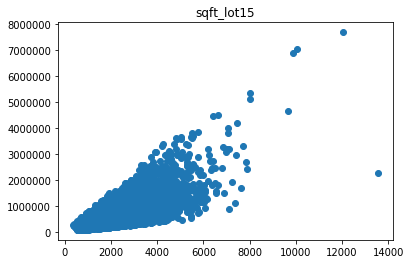

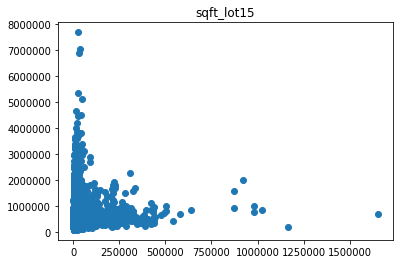

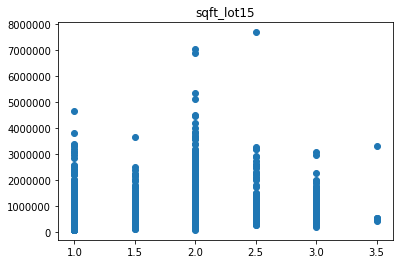

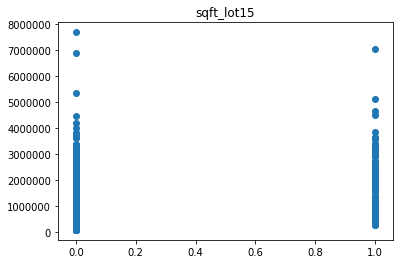

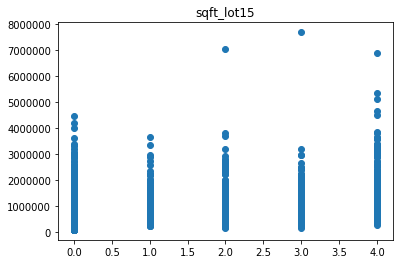

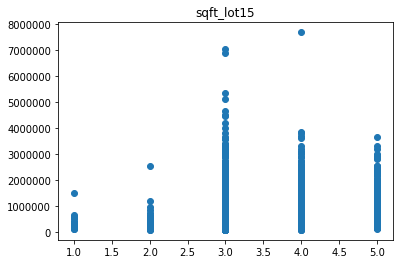

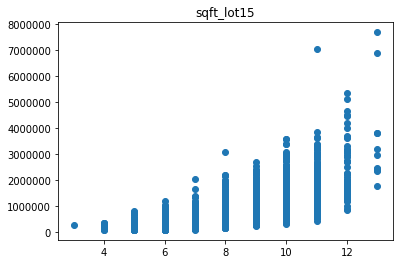

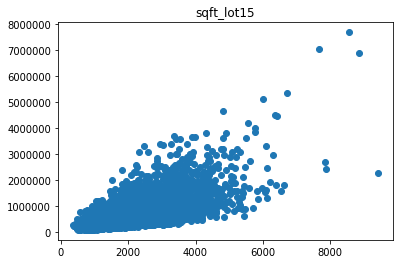

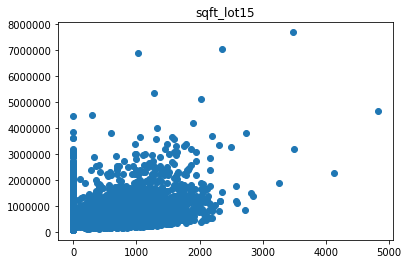

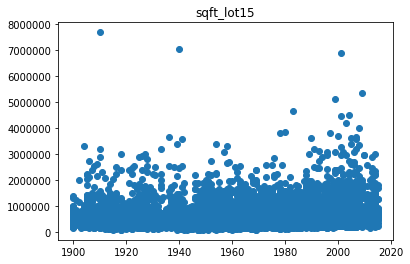

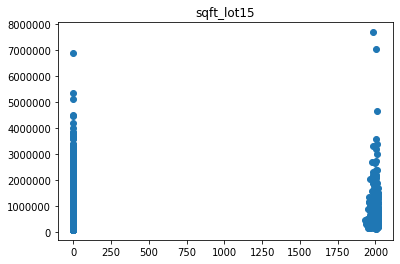

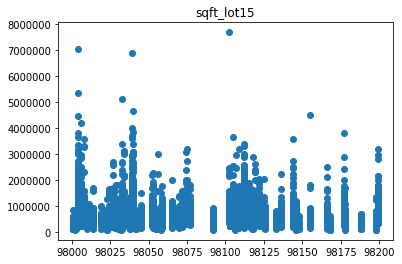

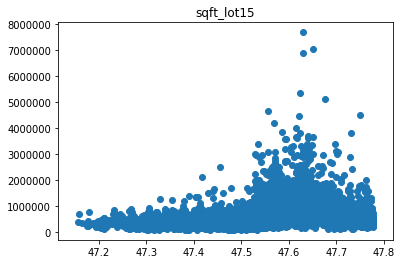

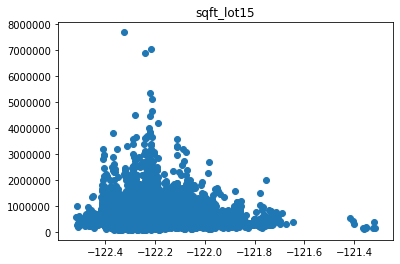

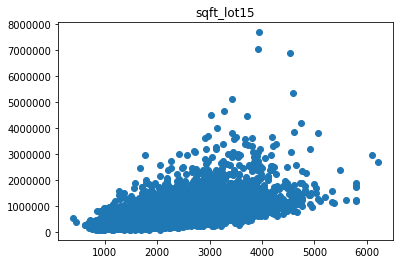

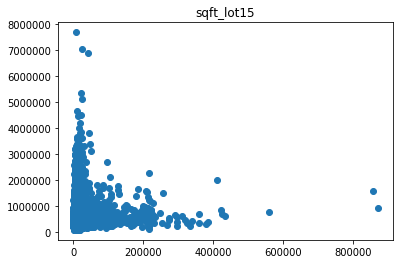

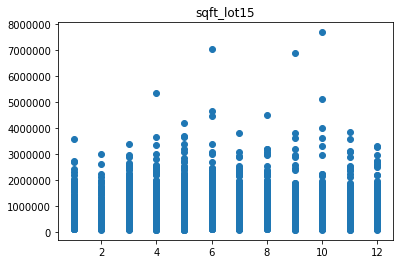

In [85]:
# Visualizing the number columns
for column in number_cols[2:]:
    plt.scatter(data[column], data['price'])
    plt.title(col)
    plt.show()

In [88]:
# Changing the column type and filling the values with one except the 0 values
data['is_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data[['yr_renovated','is_renovated']][:5]

,yr_renovated,is_renovated
1,1991.0,1
3,0.0,0
4,0.0,0
5,0.0,0
8,0.0,0


In [89]:
# Changing the column type and filling the values with one except the 0 values
data['with_basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data[['sqft_basement','with_basement']][:5]

,sqft_basement,with_basement
1,400.0,1
3,910.0,1
4,0.0,0
5,1530.0,1
8,730.0,1


In [93]:
# Zipping the 'lat' and 'long'
zipped_lat_long = list(zip(data.lat, data.long))
zipped_lat_long[0]

(47.721000000000004, -122.319)

In [94]:
# Creating directions for each geographical point
directions = []
for z in zipped_lat_long:

    if (z[0] >= 47.5) & (z[1] <= -122.1):
        directions.append('NW')
    elif (z[0] >= 47.5) & (z[1] > -122.1):
        directions.append('NE')
    elif (z[0] < 47.5) & (z[1] <= -122.1):
        directions.append('SW')
    else:
        directions.append('SE')



In [95]:
data['zip_lat_long'] = directions

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,month,season,is_renovated,with_basement,zip_lat_long
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,12,winter,1,1,NW
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,12,winter,0,1,NW
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,2,winter,0,0,NE
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,98053,47.6561,-122.005,4760,101930,5,spring,0,1,NE
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,98146,47.5123,-122.337,1780,8113,4,spring,0,1,NW


In [96]:
# Changing the data types to category
data['waterfront'] = data['waterfront'].astype('category')
data['view'] =data['view'].astype('category')
data['season'] = data['season'].astype('category')
data['is_renovated'] = data['is_renovated'].astype('category')
data['floors']=data['floors'].astype('category')
data['condition']=data['condition'].astype('category')
data['month']=data['month'].astype('category')
data['grade']=data['grade'].astype('category')
data['with_basement'] = data['with_basement'].astype('category')
data['bedrooms'] = data['bedrooms'].astype('category')
data['zip_lat_long']= data['zip_lat_long'].astype('category')

In [97]:

# Defining a list of categorical data
categ_col=['waterfront', 'view', 'season', 'is_renovated', 'floors', 'condition', 'zip_lat_long', 'grade', 'with_basement', 'bedrooms']

/home/angelo/anaconda3/envs/flatiron/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/home/angelo/anaconda3/envs/flatiron/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/home/angelo/anaconda3/envs/flatiron/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/home/angelo/anaconda3/envs/flatiron/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/home/angelo/anaconda3/envs/flatiron/lib/pyt

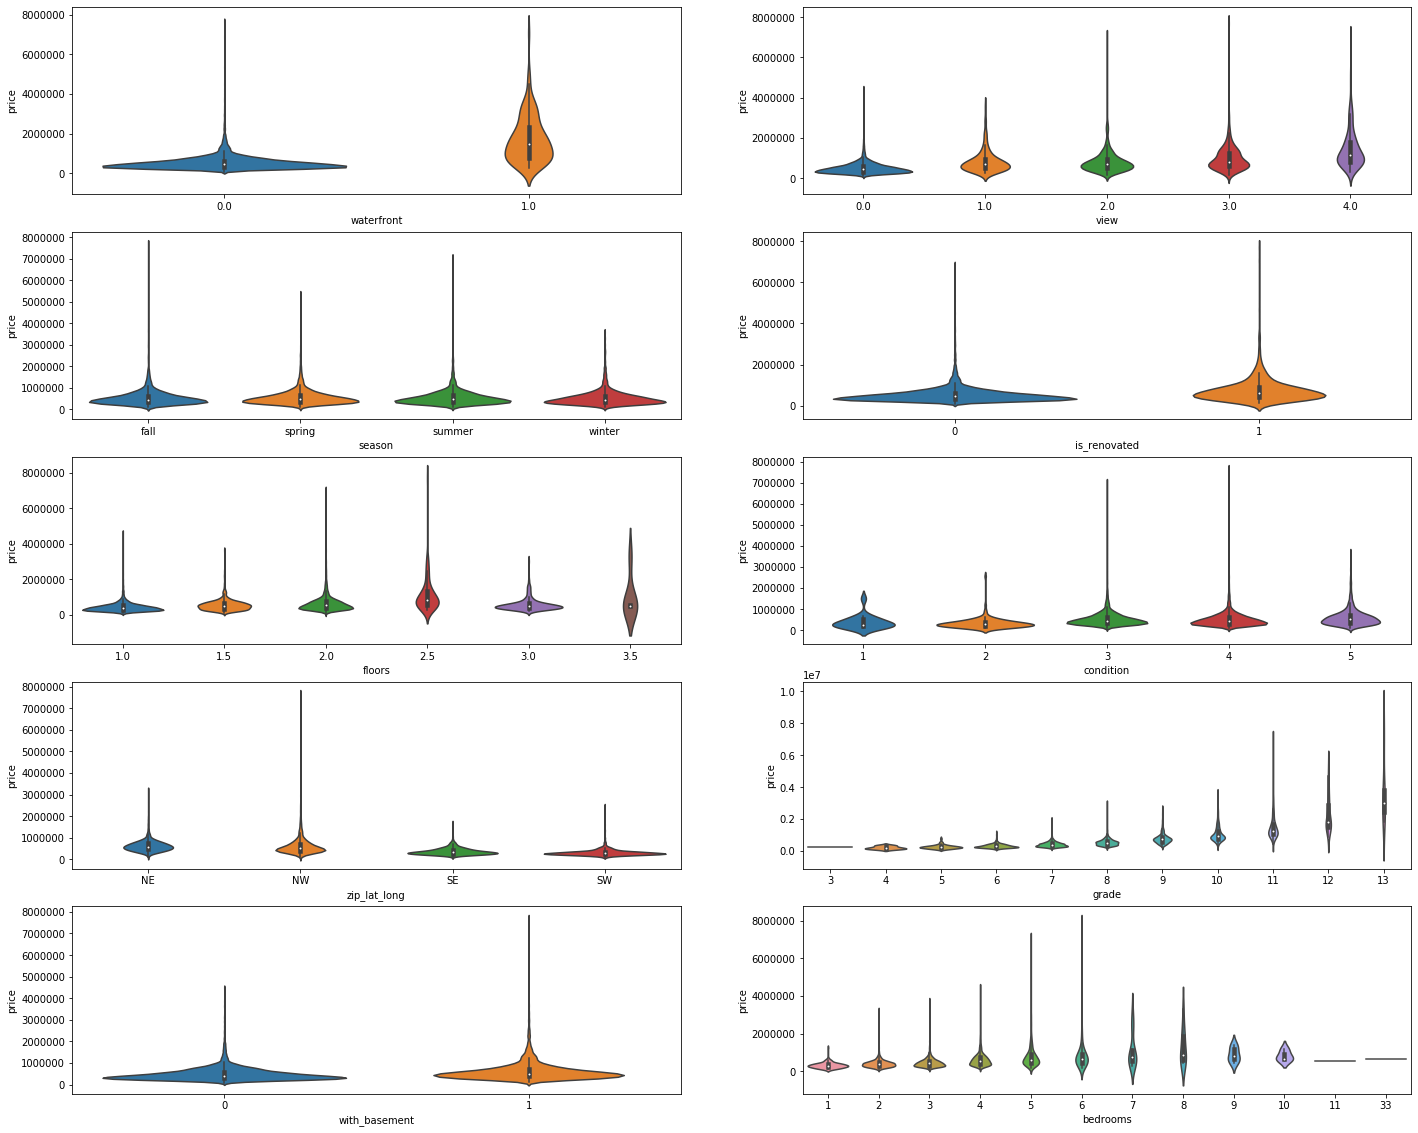

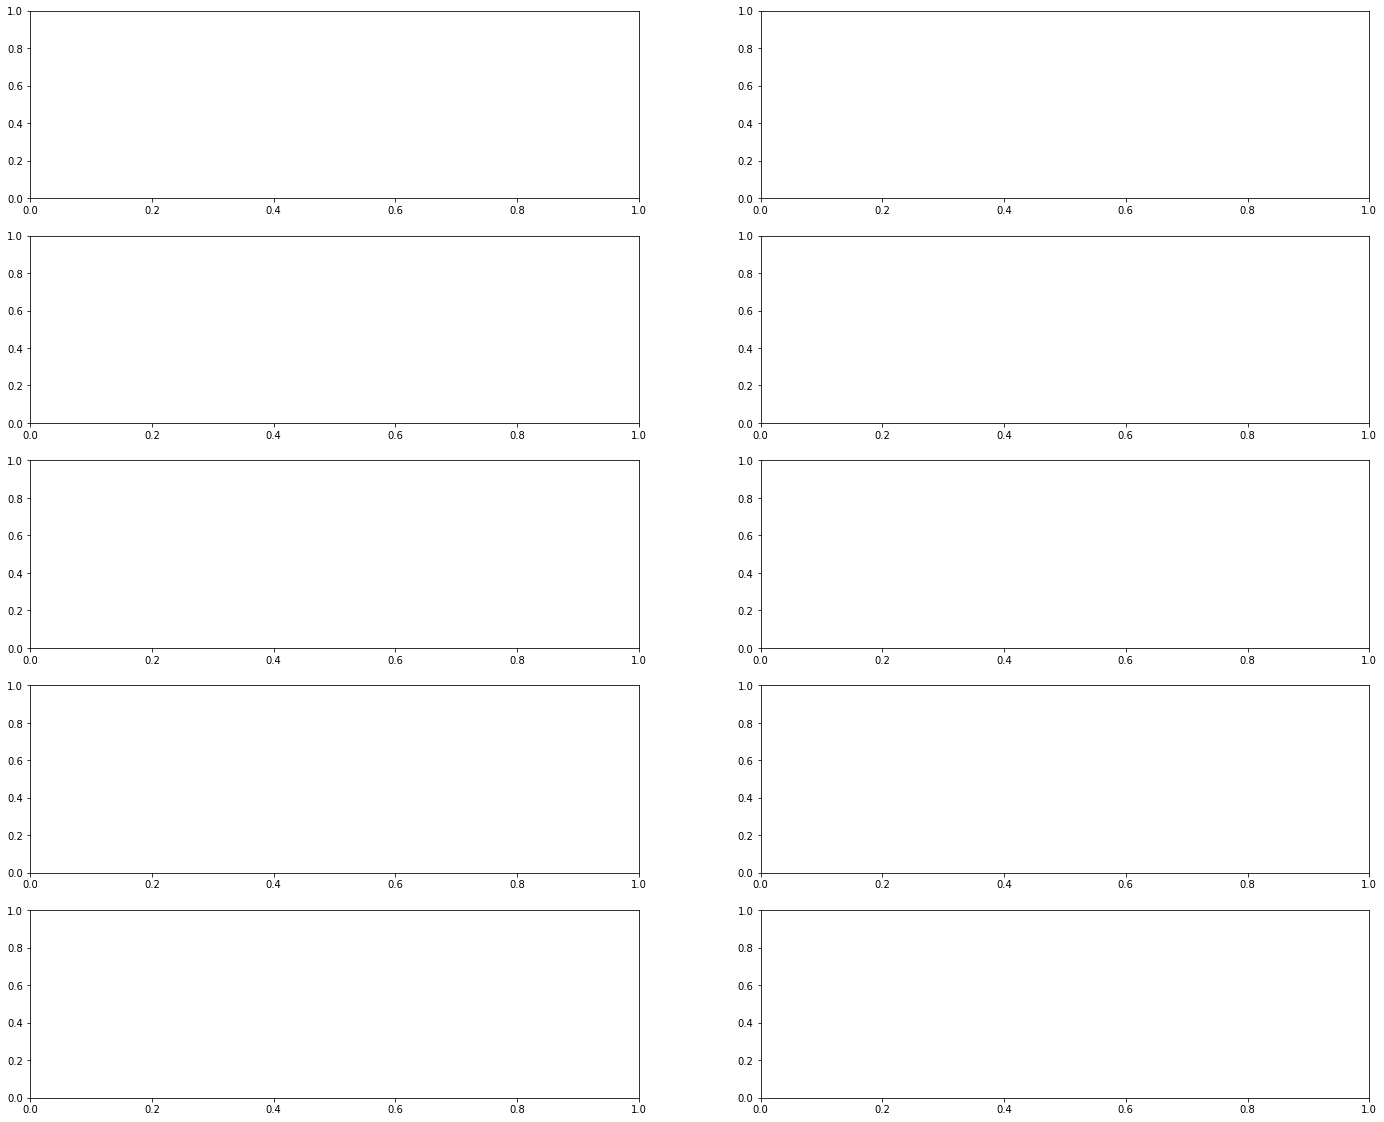

In [101]:
fig, ax1 = plt.subplots(5, 2, figsize=(24,20))
ax1 = ax1.flatten()
fig, ax2 = plt.subplots(5, 2, figsize=(24,20))
ax2 = ax2.flatten()
for c, column in enumerate(categ_col):
    
    sns.violinplot(x=column, y="price", data=data, ax=ax1[c]);
    sns.catplot(x=column, y="price", data=data, ax=ax2[c]);

    plt.close(3)
    plt.close(4)
    
plt.show()

# Dealing with Outliers


In [106]:
def cleaning_outliers(data, column, iqr_denom):
    
    # Calculating the IQR for the each column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f'IQR for column {col} is: {IQR}')
    
    data = data[~(
        (data[column] < (Q1 - iqr_denom * IQR))
        |
        (data[column] > (Q3 + iqr_denom * IQR))
    )]
    
    print(f'Number of rows after removing outliers: {data.shape[0]}')
    
    return data

In [107]:
# Implementing the funtion
iqr_denom = 3
con_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
data_cleaned = data.copy(deep=True)

for column in con_cols:
    data_cleaned = cleaning_outliers(data_cleaned, column, iqr_denom)

IQR for column sqft_lot15 is: 323500.0
Number of rows after removing outliers: 15128
IQR for column sqft_lot15 is: 1090.0
Number of rows after removing outliers: 15109
IQR for column sqft_lot15 is: 5482.0
Number of rows after removing outliers: 13854
IQR for column sqft_lot15 is: 910.0
Number of rows after removing outliers: 13847
IQR for column sqft_lot15 is: 540.0
Number of rows after removing outliers: 13837
IQR for column sqft_lot15 is: 800.0
Number of rows after removing outliers: 13826
IQR for column sqft_lot15 is: 4280.25
Number of rows after removing outliers: 13667


In [110]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13667 entries, 1 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             13667 non-null  int64         
 1   date           13667 non-null  datetime64[ns]
 2   price          13667 non-null  float64       
 3   bedrooms       13667 non-null  category      
 4   bathrooms      13667 non-null  float64       
 5   sqft_living    13667 non-null  int64         
 6   sqft_lot       13667 non-null  int64         
 7   floors         13667 non-null  category      
 8   waterfront     13667 non-null  category      
 9   view           13667 non-null  category      
 10  condition      13667 non-null  category      
 11  grade          13667 non-null  category      
 12  sqft_above     13667 non-null  int64         
 13  sqft_basement  13667 non-null  float64       
 14  yr_built       13667 non-null  int64         
 15  yr_renovated   1366

In [109]:
data_cleaned['bedrooms'] = data_cleaned['bedrooms'].replace(33, 3)
data_cleaned['bedrooms'].unique()

[3, 4, 2, 5, 1, ..., 7, 8, 9, 11, 10]
Length: 11
Categories (11, int64): [3, 4, 2, 5, ..., 8, 9, 11, 10]

In [ ]:
# Creating dummy variable for categorical data
data_cleaned_view_dummy = pd.get_dummies(data_cleaned['view'], prefix='vw', drop_first=True)
data_cleaned_condition_dummy = pd.get_dummies(data_cleaned['condition'], prefix='condition', drop_first=True)
data_cleaned_floors_dummy = pd.get_dummies(data_cleaned'floors'], prefix='floor')
data_cleaned_floors_dummy.drop(columns=['floor_3.5'], inplace=True)
data_cleaned_season_dummy = pd.get_dummies(data_cleaned['season'])
data_cleaned_season_dummy.drop(columns = ['winter'], inplace=True)
data_cleaned_season_dummy.head()
data_cleaned_grade_dummy=pd.get_dummies(data_cleaned['grade'], prefix='gr')
data_cleaned_grade_dummy.drop(columns = ['gr_13'], inplace=True)
data_cleaned_bedrooms_dummy = pd.get_dummies(data_cleaned['bedrooms'], prefix='bedroom')
data_cleaned_bedrooms_dummy.drop(columns=['bedroom_33'], inplace=True)
data_cleaned_zip_latlong_dummy = pd.get_dummies(data_cleaned['zip_lat_long'])
data_cleaned_zip_latlong_dummy.drop(columns = ['SE'], inplace=True)

In [ ]:
data1.sample(5)

In [16]:
X=data1.drop(['price'],axis=1)
y= data1['price']

In [17]:
X.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'sqft_basement_920.0', 'sqft_basement_930.0', 'sqft_basement_935.0',
       'sqft_basement_940.0', 'sqft_basement_950.0', 'sqft_basement_960.0',
       'sqft_basement_970.0', 'sqft_basement_980.0', 'sqft_basement_990.0',
       'sqft_basement_?'],
      dtype='object', length=302)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [19]:
x_train.shape, x_test.shape

((12517, 302), (3130, 302))

In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [21]:
print('Training_score: ', linear_model.score(x_train, y_train))

Training_score:  0.7381200183352509


In [22]:
predictors = x_train.columns
predictors

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'sqft_basement_920.0', 'sqft_basement_930.0', 'sqft_basement_935.0',
       'sqft_basement_940.0', 'sqft_basement_950.0', 'sqft_basement_960.0',
       'sqft_basement_970.0', 'sqft_basement_980.0', 'sqft_basement_990.0',
       'sqft_basement_?'],
      dtype='object', length=302)

In [23]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

sqft_basement_2100.0   -1.330117e+20
sqft_basement_2190.0   -4.737841e+19
sqft_basement_1960.0   -3.504602e+19
sqft_basement_1910.0   -1.292930e+19
sqft_basement_1913.0   -6.892122e+18
                            ...     
sqft_basement_2600.0    4.141923e+18
sqft_basement_1245.0    5.448096e+18
sqft_basement_1852.0    1.512870e+19
sqft_basement_1798.0    1.788941e+19
sqft_basement_2080.0    5.584730e+19
Length: 302, dtype: float64


In [24]:
y_pred = linear_model.predict(x_test)

In [25]:
df_pred_actual= pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
16739,349668.6875,277500.0
5442,571024.8125,300000.0
13334,517207.6250,336000.0
3936,468720.9375,433500.0
12529,495726.5000,550000.0
12804,187744.7500,242500.0
9947,626723.8750,605000.0
4741,315783.8125,353000.0
1864,557249.8750,475000.0
18075,280225.8750,343500.0


In [26]:
from sklearn.metrics import r2_score
print('Testing_score : ', r2_score(y_test, y_pred))

Testing_score :  -5.5687111901365615e+25


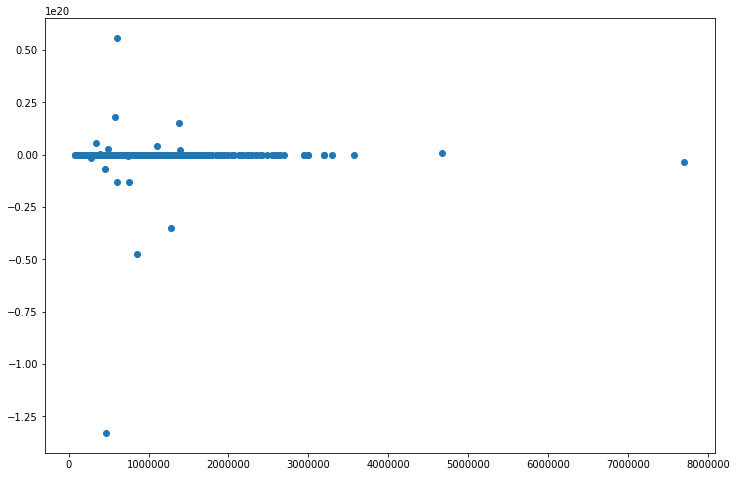

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.show()

In [28]:
df_pred_actual_sample= df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [29]:
df_pred_actual_sample.head()

,index,predicted,actual
0,8160,653585.9375,441000.0
1,2057,641298.2500,429000.0
2,8439,516243.6875,549950.0
3,12160,587359.5625,437000.0
4,4974,524904.0000,599000.0


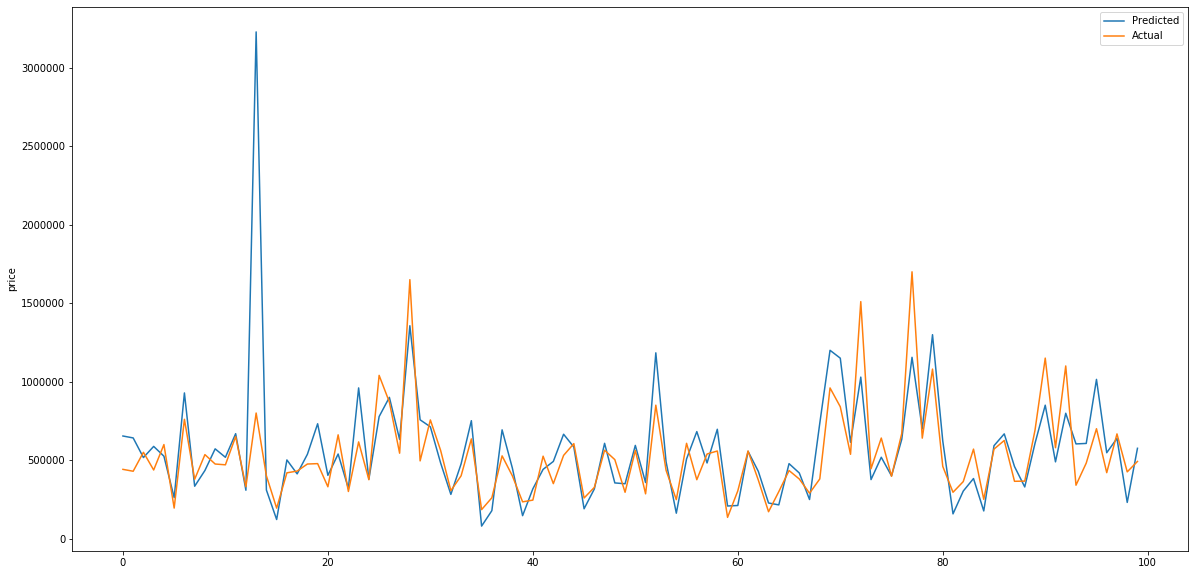

In [30]:
plt.figure(figsize = (20,10))
plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('price')

plt.legend()
plt.show()

# Logistic regression

In [31]:
median = data1['price'].median()
median

450000.0

In [32]:
data1['above_median']=(data1['price']-median) > 0

In [33]:
data1.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0,sqft_basement_?,above_median
16039,8651442910,20150325,247500.0,4,2.0,1710,5200,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,False
2695,3352400004,20150129,184500.0,2,1.0,720,5880,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,False
11918,723069128,20140514,543000.0,2,2.0,2370,217800,1.5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,True
1895,6381500505,20150402,400000.0,3,1.0,1250,7157,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,False
11167,8901001290,20140903,477000.0,4,1.5,1380,7800,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,True


In [34]:
X = data1.drop(['price', 'above_median'], axis=1)
Y = data1['above_median']

In [35]:
X.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'sqft_basement_920.0', 'sqft_basement_930.0', 'sqft_basement_935.0',
       'sqft_basement_940.0', 'sqft_basement_950.0', 'sqft_basement_960.0',
       'sqft_basement_970.0', 'sqft_basement_980.0', 'sqft_basement_990.0',
       'sqft_basement_?'],
      dtype='object', length=302)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

In [37]:
x_train.shape, x_test.shape

((12517, 302), (3130, 302))

In [38]:
y_train.shape, y_test.shape

((12517,), (3130,))

In [39]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver = 'liblinear').fit(x_train, y_train)

In [40]:
print('Training_score : ', logistic_model.score(x_train, y_train))

Training_score :  0.5484541024207078


In [41]:
y_pred = logistic_model.predict(x_test)

In [42]:
df_pred_actual1= pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual1.head(10)

,predicted,actual
14925,False,False
3241,False,False
10902,True,True
12745,True,True
5217,False,False
14703,True,False
15502,False,True
16662,False,True
16687,False,True
8244,True,False


In [43]:
from sklearn.metrics import accuracy_score
print('Testing_score: ', accuracy_score(y_test, y_pred))

Testing_score:  0.5345047923322683
